In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Conductivity function a(x)
def conductivity(x):
    return 1 + 0 * x

In [3]:
# Right-hand side function f(x)
def my_function(x):
    return 1 + 0 * x

In [4]:
# Stiffness Matrix Assembly
def stiffness_matrix(x, conductivity_func, kappa):
    n = len(x) - 1
    A = np.zeros((n + 1, n + 1))
    for i in range(n):
        h = x[i + 1] - x[i]
        xmid = (x[i + 1] + x[i]) / 2
        a_mid = conductivity_func(xmid)
        A[i, i] += a_mid / h
        A[i + 1, i + 1] += a_mid / h
        A[i, i + 1] -= a_mid / h
        A[i + 1, i] -= a_mid / h

    # Apply Dirichlet BCs using large kappa values
    A[0, 0] += kappa[0]
    A[-1, -1] += kappa[1]
    return A

In [5]:
# Load vector assembly
def load_vector(x, f, g, kappa):
    n = len(x) - 1
    b = np.zeros(n + 1)
    for i in range(n):
        h = x[i + 1] - x[i]
        b[i] += f(x[i]) * h / 2
        b[i + 1] += f(x[i + 1]) * h / 2

    # Add BC contributions
    b[0] += kappa[0] * g[0]
    b[-1] += kappa[1] * g[1]
    return b

In [6]:
# Analytic solution for validation
def exact_solution(x):
    return -x**2 / 2 + x / 2

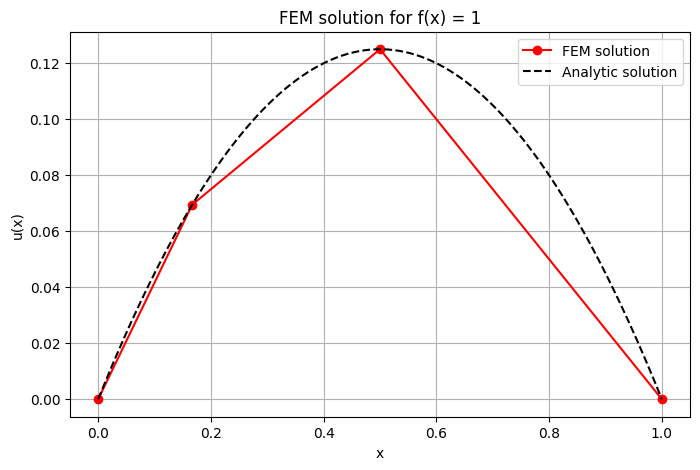

In [7]:
# Main FEM Solver
def main():
    # Mesh definition
    x = np.array([0, 1/6, 1/2, 1])  # Non-uniform mesh
    kappa = [1e6, 1e6]             # Dirichlet conditions
    g = [0, 0]                     # Boundary values

    A = stiffness_matrix(x, conductivity, kappa)
    b = load_vector(x, my_function, g, kappa)
    xi = np.linalg.solve(A, b)

    # Plot results
    xx = np.linspace(0, 1, 200)
    analytic = exact_solution(xx)

    plt.figure(figsize=(8, 5))
    plt.plot(x, xi, 'ro-', label="FEM solution")
    plt.plot(xx, analytic, 'k--', label="Analytic solution")
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.title("FEM solution for f(x) = 1")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
